Instructions:
Create a new notebook for working out the data loader and augmentation (DataLoader.ipynb). Follow the Keras examples and this notebook. Setup the dataset for a demonstration of transfer learning Perform any cleaning necessary, like throwing out bad images. This will be specific to your dataset. You may discover a problem later, come back and eliminate the bad images here. Select at most 5 classes. Discard the rest of the data. Create a smaller subset of less 100 images per class for training and testing. Figure out how the labels are provided and create a data loader to load the data. If the images are separated into subdirectories, the example above works. If the image information is in a CSV file, easist path is to figure out the way to separate your classes into subdirectories and use the above example. Visualize the images, making sure the data loader is working properly. Create a module which holds the data loader and any other code you may need to reuse.

This dataset contains 900 images of jellyfish belonging to six different categories and species: mauve stinger jellyfish, moon jellyfish, barrel jellyfish, blue jellyfish, compass jellyfish, and lion’s mane jellyfish. You can apply ML techniques to gain insights into jellyfish classification, species identification, and color analysis. Moon jellyfish (Aurelia aurita): Common jellyfish with four horseshoe-shaped gonads visible through the top of its translucent bell. It feeds by collecting medusae, plankton, and mollusks with its tentacles. Barrel jellyfish (Rhizostoma pulmo): Largest jellyfish found in British waters, with a bell that can grow up to 90 cm in diameter. It feeds on plankton and small fish by catching them in its tentacles. Blue jellyfish (Cyanea lamarckii): Large jellyfish that can grow up to 30 cm in diameter. It feeds on plankton and small fish by catching them in its tentacles. Compass jellyfish (Chrysaora hysoscella): Named after the brown markings on its bell that resemble a compass rose. It feeds on plankton and small fish by catching them in its tentacles. Lion’s mane jellyfish (Cyanea capillata): Largest jellyfish in the world, with a bell that can grow up to 2 meters in diameter and tentacles that can reach up to 30 meters in length. It feeds on plankton and small fish by catching them in its tentacles. Mauve stinger (Pelagia noctiluca): Small jellyfish with long tentacles and warty structures on its bell full of stinging cells. It feeds on other small jellyfish and oceanic sea squirts.

Use Cases: Jellyfish classification: Use machine learning techniques to classify jellyfish images into different categories based on their physical characteristics. Species identification: Use machine learning techniques to identify the species of jellyfish in your dataset based on their physical characteristics. Color analysis: Use machine learning techniques to analyze the color patterns of jellyfish in your dataset.
Link to Data: https://www.kaggle.com/datasets/anshtanwar/jellyfish-types/data

In [ ]:
import os
import numpy as np
import keras
from keras import layers
from tensorflow import data as tf_data
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
archive_path = '/content/drive/MyDrive/archive'



The code below achieves the following.

1.Setup the dataset for a demonstration of transfer learning:
The code selected at most 5 classes from the dataset (mauve_stinger_jellyfish, moon_jellyfish, barrel_jellyfish, blue_jellyfish, and compass_jellyfish) and discarded the rest of the data.

2. Perform any cleaning necessary, like throwing out bad images:
While the code did not explicitly remove bad images, it attempted to copy images from each selected class directory to a subset dataset directory.

3. Create a smaller subset of less than 100 images per class for training and testing:
The code created a subset of the dataset with less than 100 images per class for training. It randomly selected up to 100 images from each class and copied them to the training subset directory.

4. Figure out how the labels are provided and create a data loader to load the data:
While the code did not explicitly create a data loader, it structured the subset dataset into directories representing classes (e.g., mauve_stinger_jellyfish) within the training subset directory. This directory structure is suitable for creating a data loader to load the data for training.

In [ ]:
import os
import shutil
import random

# Define paths
archive_path = '/content/drive/MyDrive/archive'
subset_path = '/content/subset'  # Define the path for the subset dataset

# Select classes and discard extra classes
selected_classes = [
    'mauve_stinger_jellyfish',
    'Moon_jellyfish',
    'barrel_jellyfish',
    'blue_jellyfish',
    'compass_jellyfish'
]

# Create the subset dataset directory structure
for subset_type in ['train', 'test']:
    for class_name in selected_classes:
        os.makedirs(os.path.join(subset_path, subset_type, class_name), exist_ok=True)

# Create subset with less than 100 images per class
for class_name in selected_classes:
    class_folder = os.path.join(archive_path, class_name)
    if not os.path.exists(class_folder):
        print(f"Warning: {class_folder} does not exist. Skipping...")
        continue

    class_images = os.listdir(class_folder)
    random.shuffle(class_images)
    selected_images = class_images[:100] if len(class_images) >= 100 else class_images

    for image in selected_images:
        src = os.path.join(class_folder, image)
        dst = os.path.join(subset_path, 'train', class_name, image)
        shutil.copy(src, dst)

# Verify the subset dataset structure and contents
print("Subset dataset created successfully!")



Subset dataset created successfully!


 Here, I am creating a data loader.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Define paths
train_data_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/Train'  # Path to the training subset directory
test_data_dir = '/content/drive/MyDrive/archive/Train_Test_Valid/test'    # Path to the testing subset directory

# Define image dimensions and batch size
img_width, img_height = 224, 224  # Set the desired image dimensions
batch_size = 32                   # Set the batch size

# Create data generator for training data with augmentation
train_datagen = ImageDataGenerator(
    rescale=1. / 255,            # Rescale pixel values to [0, 1]
    shear_range=0.2,             # Apply random shear transformations
    zoom_range=0.2,              # Apply random zoom transformations
    horizontal_flip=True)        # Apply random horizontal flips

# Create data generator for testing data (no augmentation)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Create data loader for training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')   # Use categorical mode for multi-class classification

# Create data loader for testing data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False)


Found 900 images belonging to 6 classes.
Found 40 images belonging to 6 classes.



To visualize the images and ensure that the data loader is working properly, I have used  Matplotlib to display sample images from my dataset.

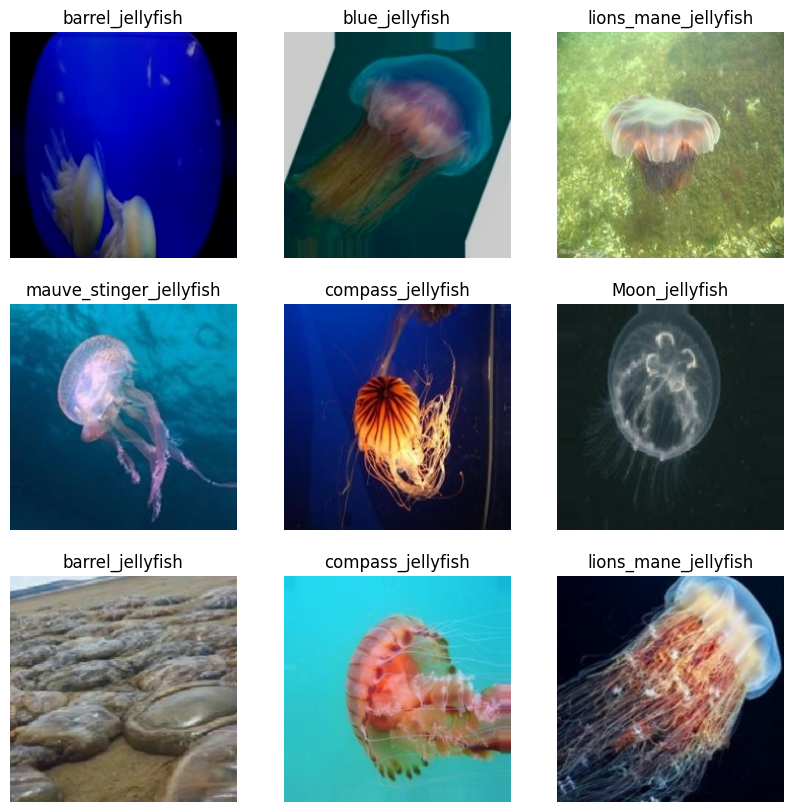

In [ ]:
import matplotlib.pyplot as plt

# Visualize sample images from the training dataset
sample_images, sample_labels = next(train_generator)

# Define the class names
class_names = list(train_generator.class_indices.keys())

# Plot the sample images
plt.figure(figsize=(10, 10))
for i in range(9):  # Plot the first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(class_names[sample_labels[i].argmax()])  # Convert one-hot encoding to class name
    plt.axis("off")
plt.show()


Here, I have created a module which holds the data loader and any other code I may need to reuse.

In [ ]:
# data_loader.py

from keras.preprocessing.image import ImageDataGenerator

def create_data_generators(train_data_dir, test_data_dir, img_width=224, img_height=224, batch_size=32):
    # Create data generator for training data with augmentation
    train_datagen = ImageDataGenerator(
        rescale=1. / 255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

    # Create data generator for testing data (no augmentation)
    test_datagen = ImageDataGenerator(rescale=1. / 255)

    # Create data loader for training data
    train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical')

    # Create data loader for testing data
    test_generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(img_width, img_height),
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

    return train_generator, test_generator
